In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=657be9661dd6511a9e2c7728f26ea5d2


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10n"},{"id":701,"main":"Mist","description":"mist","icon":"50n"}],"base":"stations","main":{"temp":43.02,"feels_like":30.34,"temp_min":41,"temp_max":45,"pressure":1007,"humidity":87},"visibility":4828,"wind":{"speed":18.34,"deg":20,"gust":28.86},"rain":{"1h":1.68},"clouds":{"all":90},"dt":1604034106,"sys":{"type":1,"id":3486,"country":"US","sunrise":1604056535,"sunset":1604094000},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 43.02,
  'feels_like': 30.34,
  'temp_min': 41,
  'temp_max': 45,
  'pressure': 1007,
  'humidity': 87},
 'visibility': 4828,
 'wind': {'speed': 18.34, 'deg': 20, 'gust': 28.86},
 'rain': {'1h': 1.68},
 'clouds': {'all': 90},
 'dt': 1604034106,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604056535,
  'sunset': 1604094000},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1604056535,
 'sunset': 1604094000}

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 45 87 90 18.34


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 30, 5, 1, 46)

In [22]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-10-30 05:01:46'

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | rudiskes
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | topchikha
Processing Record 7 of Set 1 | sheksna
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | olinda
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | komsomolskiy
Processing Record 18 of Set 1 | palauig
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | chernyshevskiy
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | cape town
Processi

Processing Record 39 of Set 4 | babanusah
City not found. Skipping...
Processing Record 40 of Set 4 | dodoma
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | skoghall
Processing Record 44 of Set 4 | porbandar
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | shieli
Processing Record 47 of Set 4 | coxim
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | saint-pierre
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | shabqadar
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | tautira
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | gbarnga
Processing Record 7 of Set 5 | pontecorvo
Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 5 | auki
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | provideniya
Processing Rec

Processing Record 30 of Set 8 | kaeo
Processing Record 31 of Set 8 | westport
Processing Record 32 of Set 8 | aginskoye
Processing Record 33 of Set 8 | zinder
Processing Record 34 of Set 8 | mersing
Processing Record 35 of Set 8 | noyabrsk
Processing Record 36 of Set 8 | canutama
Processing Record 37 of Set 8 | pinawa
Processing Record 38 of Set 8 | adamas
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | cabo san lucas
Processing Record 42 of Set 8 | sompeta
Processing Record 43 of Set 8 | carlsbad
Processing Record 44 of Set 8 | kavarna
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | torbay
Processing Record 47 of Set 8 | morondava
Processing Record 48 of Set 8 | kayerkan
Processing Record 49 of Set 8 | popondetta
Processing Record 50 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 9 | asfi
Processing Record 2 of Set 9 | nabire
Processing Record 3 of Set 9 |

Processing Record 22 of Set 12 | tocopilla
Processing Record 23 of Set 12 | odweyne
Processing Record 24 of Set 12 | mikhaylovka
Processing Record 25 of Set 12 | kuanshan
City not found. Skipping...
Processing Record 26 of Set 12 | agadez
Processing Record 27 of Set 12 | ganzhou
Processing Record 28 of Set 12 | owatonna
Processing Record 29 of Set 12 | elat
Processing Record 30 of Set 12 | gopalpur
Processing Record 31 of Set 12 | kupino
Processing Record 32 of Set 12 | nanortalik
Processing Record 33 of Set 12 | octeville
Processing Record 34 of Set 12 | florianopolis
Processing Record 35 of Set 12 | dongsheng
Processing Record 36 of Set 12 | corinto
Processing Record 37 of Set 12 | avera
Processing Record 38 of Set 12 | nantucket
Processing Record 39 of Set 12 | ust-maya
Processing Record 40 of Set 12 | north bend
Processing Record 41 of Set 12 | coihaique
Processing Record 42 of Set 12 | mosquera
Processing Record 43 of Set 12 | astana
Processing Record 44 of Set 12 | araguaina
Proc

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,77.85,55,8,4.07,TL,2020-10-30 05:23:31
1,Punta Arenas,-53.15,-70.92,46.40,70,75,23.04,CL,2020-10-30 05:23:31
2,Rudiskes,54.52,24.83,46.99,100,90,6.93,LT,2020-10-30 05:23:31
3,Hithadhoo,-0.60,73.08,83.32,76,81,12.53,MV,2020-10-30 05:23:31
4,Jamestown,42.10,-79.24,42.01,93,90,13.87,US,2020-10-30 05:23:32
5,Topchikha,52.82,83.12,32.00,98,75,22.37,RU,2020-10-30 05:23:32
6,Sheksna,59.21,38.51,42.80,100,90,6.71,RU,2020-10-30 05:23:32
7,Pisco,-13.70,-76.22,62.01,87,75,12.75,PE,2020-10-30 05:23:33
8,Hermanus,-34.42,19.23,50.00,82,44,1.01,ZA,2020-10-30 05:19:18
9,Hilo,19.73,-155.09,77.00,88,90,3.27,US,2020-10-30 05:23:33


In [29]:
len(city_data)

577

In [32]:
# Change the column order
columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2020-10-30 05:23:31,-8.93,125.41,77.85,55,8,4.07
1,Punta Arenas,CL,2020-10-30 05:23:31,-53.15,-70.92,46.40,70,75,23.04
2,Rudiskes,LT,2020-10-30 05:23:31,54.52,24.83,46.99,100,90,6.93
3,Hithadhoo,MV,2020-10-30 05:23:31,-0.60,73.08,83.32,76,81,12.53
4,Jamestown,US,2020-10-30 05:23:32,42.10,-79.24,42.01,93,90,13.87
...,...,...,...,...,...,...,...,...,...
572,Qaqortoq,GL,2020-10-30 05:26:53,60.72,-46.03,30.20,86,81,7.25
573,Rudna,CZ,2020-10-30 05:26:54,50.03,14.23,46.40,93,75,10.29
574,Saldanha,ZA,2020-10-30 05:26:54,-33.01,17.94,48.20,76,0,4.70
575,Young,UY,2020-10-30 05:26:55,-32.68,-57.63,43.99,94,1,6.44


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [51]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604120455.0342

In [52]:
today = time.strftime("%x")
today

'10/30/20'

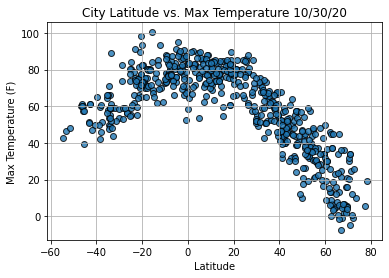

In [53]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

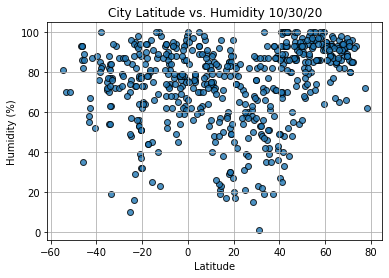

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

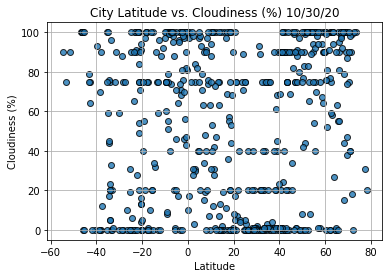

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

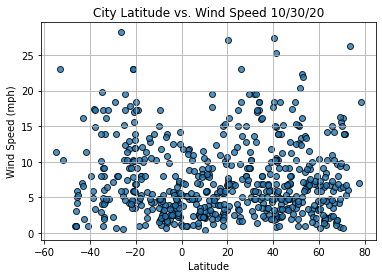

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()